# Objective: To understand the importance of scaling on PCA

In [1]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

import warnings
#warnings.filterwarnings(action="error", category=np.ComplexWarning)

np.seterr(all="raise")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Task 0: Write the function to compute the pca using Eigenvector approach

In [2]:
from numpy.linalg import svd 
def pca(X):
    XTX = X.T @ X
    Sigma2, P = np.linalg.eig(XTX)
    assert np.all(Sigma2 >= 0)
    order = np.argsort(np.abs(Sigma2))[::-1]
    P = P[:,order]
    Sigma = np.sqrt(Sigma2[order])

    XXT = X @ X.T
    Sigma_, U = np.linalg.eig(XXT)
    r = len(order)
    T = U[:,:r][:,order] @ np.diag(Sigma)

    return T, Sigma, P #Score, Variace, Loadings

def pca_svd(X):
    U, S, PTrans = svd(X, full_matrices=False)
    Sigma = np.diag(S)
    T=np.dot(U,Sigma)
    P=PTrans.T
    return T, Sigma, P #Score, Variace, Loadings

features, target = load_wine(return_X_y=True)
X = features
T, Sigma, P = pca(X)

T_svd, Sigma_svd, P_svd = pca_svd(X)

pca = pca_svd


    X: m x n 
    XTX: n x n
    XXT: m x m

    P: n x n
    U: m x m 

*Note:* My own calculations give complex numbers with complex part 0 (possibly some numerical errors with giving -0). Also note that my calculations of the eigenvalues and eigenvectors give opposite sign of that coming from SVD. This is no problem since the eigenvectors are defined up to a scaling factor with arbitrary sign. 

In [3]:
features, target = load_wine(return_X_y=True)
X = features
y = target

# Three different ways of scaling
* Scaling by removing the mean and divising by the standard deviation so the standard deviation is 1 for each features (any assumptions about gaussianity?)

        standard_scaling = preprocessing.StandardScaler()

        X_standard = standard_scaling.fit_transform(X)

* Scaling to minimum and maximum values of each feature so all samples for a feature lies between 0 and 1

        minmax_scaling = preprocessing.MinMaxScaler()

        X_minmax = minmax_scaling.fit_transform(X)

* Scaling by diving by the absolute value of the maximum value of each feature

        max_abs_scaler = preprocessing.MaxAbsScaler()

        X_maxabs = max_abs_scaler.fit_transform(X)

## Task 1: Create the scores plot without any scaling

In [4]:
def draw_scores_plot(T):
    global y
    
    plt.figure(figsize=(10,7))
    plt.scatter(T[:, 0], T[:, 1],
                c=y, edgecolor='green', alpha=0.9,
                cmap=plt.cm.get_cmap('Spectral', 3))
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.colorbar()
    plt.show()
    

(178, 13)


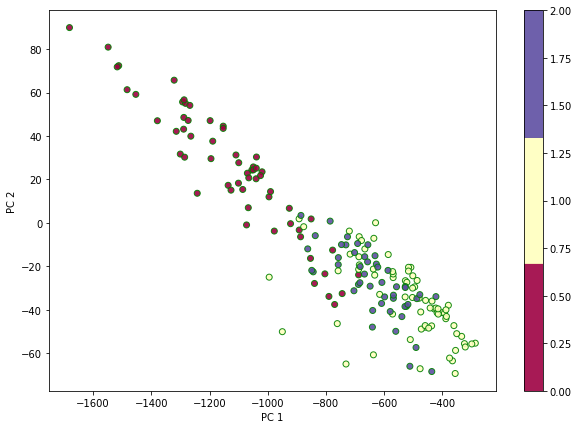

In [9]:
T, S, P = pca(X)

draw_scores_plot(T)

Notice that PC1 has order of magnitude 1000 while PC2 has order of magnitude 10. We also see that there are no good clusters, they are more or less all in each others way, except for some of the red data points.

## Task 2: Create the scores plot with standard scaling

Standard scaling mean centers and scales to unit variance. [Docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)


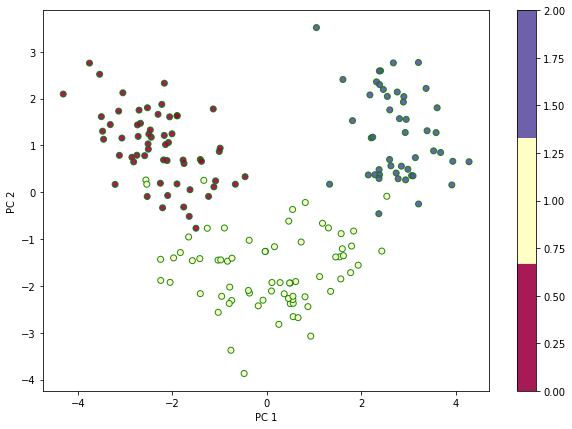

In [6]:
standard_scaler = preprocessing.StandardScaler()
X_standard = standard_scaler.fit_transform(X)
T, S, P = pca(X_standard)

draw_scores_plot(T)

We see much better separation now, and both axis are of the same order of magnitude.

## Task 3: Create the scores plot with min max scaling

Min max scaling transforms all samples in a feature lies between 0 and 1. [Docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)


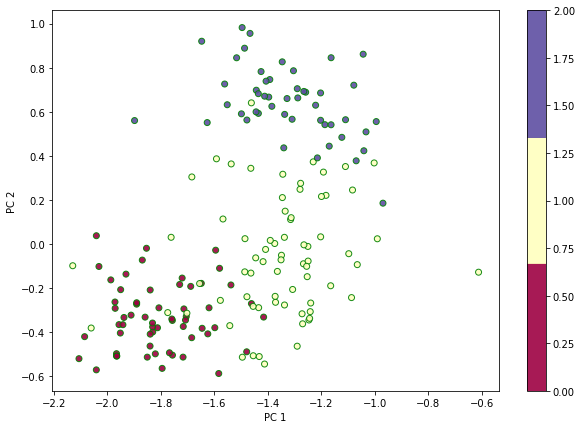

In [7]:
minmax_scaler = preprocessing.MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)
T, S, P = pca(X_minmax)

draw_scores_plot(T)


Good separation, same order of magnitude on the axes.

*Note:* Minmax scaling only gives values between 0 and 1 in the X matrix, not in the scores.

## Task 4: Create the scores plot with max abs scaling scaling

Max abs scaling transforms the features so that the maximum value has unit size. [Docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler)


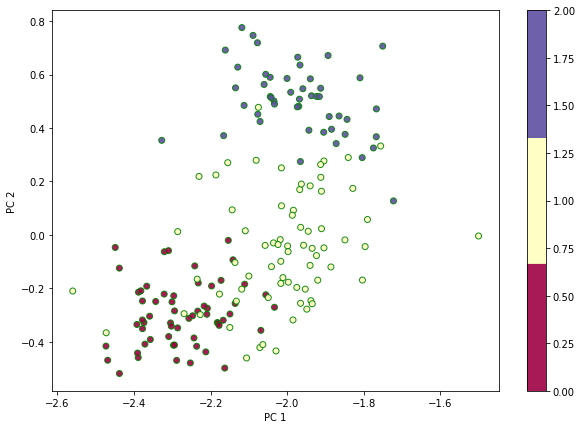

In [8]:
maxabs_scaler = preprocessing.MaxAbsScaler()
X_maxabs = maxabs_scaler.fit_transform(X)
T, S, P = pca(X_maxabs)

draw_scores_plot(T)

## Comments on scaling

When standard scaling notice that the classes become more separated than with no or the other scalings. Standard scaling is also the only scaling with mean centering. 
